In [22]:
from sklearn import datasets
import webbrowser
import pandas as pd
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter #for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [24]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm

In [25]:
import io
import requests
import pandas as pd
from zipfile import ZipFile
from IPython.display import display_html

In [26]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.0.1
numpy version: 1.18.1
seaborn version: 0.10.0


In [27]:
#pip install tensorflow==1.13.1
#pip install keras
#print(cv2.__version__)
import tensorflow as tf
import keras
print(tf.__version__)

2.1.0


In [30]:
#https://www.youtube.com/watch?v=RmbO_JUSUoY
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import backend as K
import numpy as np
from keras.preprocessing import image

In [31]:
#Dimension of our images
img_width, img_height = 150, 150
train_data_dir = 'D:/Covid-19/chest_xray/train'
validation_data_dir = 'D:/Covid-19/chest_xray/val'
nb_train_samples = 1000
nb_validation_samples = 100
epochs = 3
batch_size = 20

In [32]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3) #150,150,3
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [33]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [34]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [35]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [36]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [39]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [40]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)       

In [42]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [50]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/3
50/50 [==============================] - 35s 707ms/step - loss: 0.3663 - accuracy: 0.8560 - val_loss: 0.1011 - val_accuracy: 0.8800
Epoch 2/3
50/50 [==============================] - 40s 791ms/step - loss: 0.3426 - accuracy: 0.8544 - val_loss: 0.1980 - val_accuracy: 0.9200
Epoch 3/3
50/50 [==============================] - 38s 769ms/step - loss: 0.3302 - accuracy: 0.8510 - val_loss: 0.2044 - val_accuracy: 0.8600


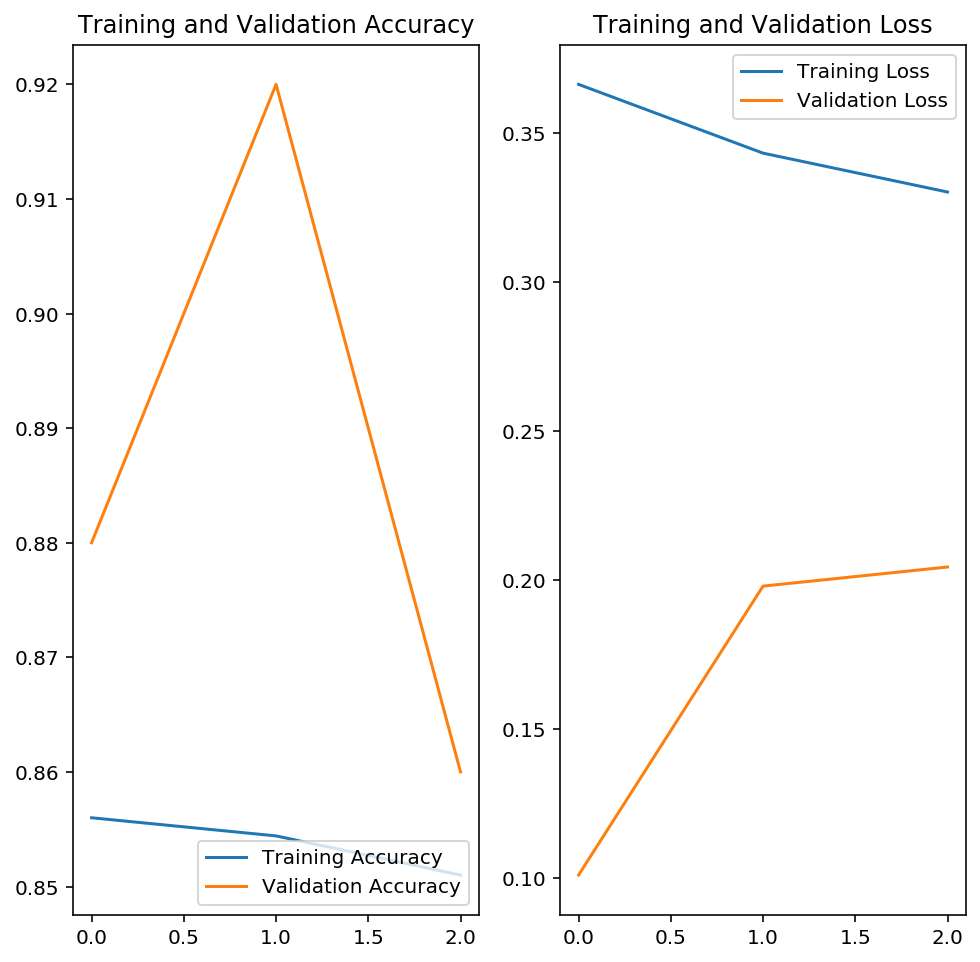

In [85]:
#https://www.tensorflow.org/tutorials/images/classification
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [88]:
#https://keras.io/getting-started/faq/#savingloading-whole-models-architecture-weights-optimizer-state
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [89]:
model

In [90]:
#Save to C:\Users\Techatach #1
open("Covid19_Data.h5", "wb")
model.save_weights('Covid19_Data.h5')
data = model.load_weights('Covid19_Data.h5')

In [91]:
data

In [79]:
model.save_weights('my_model_weights.h5')
#model.load_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5', by_name=True)

In [82]:
# new model
model = Sequential()
model.add(Dense(2, input_dim=3, name='dense_1'))  # will be loaded
model.add(Dense(10, name='new_dense'))  # will not be loaded

# load weights from first model; will only affect the first layer, dense_1.
data = model.load_weights('my_model_weights.h5', by_name=True)

In [94]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_18 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# load weights from first model; will only affect the first layer, dense_1.
data = model.load_weights('my_model_weights.h5', by_name=True)

In [97]:
import json
from keras.models import model_from_json, load_model

In [98]:
model.save_weight('my_model.h5')

AttributeError: 'Sequential' object has no attribute 'save_weight'

In [100]:
img_pred = image.load_img('C:/Users/Techatach/my_model.h5', target_size = (150, 150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)

OSError: cannot find loader for this HDF5 file

In [ ]:
rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print(prediction)

In [ ]:
#https://stackoverflow.com/questions/52664110/attributeerror-sequential-object-has-no-attribute-output-names
from tensorflow.keras.models import save_model, load_model
save_model(model,'124446.model')

saved_model = load_model('124446.model', compile=False)
saved_model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
saved_model.predict([x_test])
########################################################
import json
from keras.models import model_from_json, load_model

# Save Weights + Architecture
model.save_weights('model_weights.h5')
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

# Load Weights + Architecture
with open('model_architecture.json', 'r') as f:
    new_model = model_from_json(f.read())
new_model.load_weights('model_weights.h5')

##########################################
from keras.models import save_model, load_model

# Creates a HDF5 file 'my_model.h5' 
save_model(model, 'my_model.h5') # model, [path + "/"] name of model

# Deletes the existing model
del model  

# Returns a compiled model identical to the previous one
new_model = load_model('my_model.h5')

###############################################
# using model's methods
model.save("my_model.h5")

# deletes the existing model
del model

# load the saved model back
new_model = load_model('my_model.h5')

In [22]:
#http://gg.gg/i3sac
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

In [23]:
# dimensions of our images.
img_width, img_height = 512, 512 # ขนาดของภาพแล้วแต่จะปรับเลยครับ

train_data_dir = 'D:/Covid-19/chest_xray/train' #โฟลเดอร์สำหรับเก็บไฟล์ที่ใช้ train
validation_data_dir = 'D:/Covid-19/chest_xray/val' # โฟลเดอร์สำหรับเก็บไฟล์ที่ใช้ validation

In [25]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255) # เราจะรีสเกลให้แคบลงเพื่อที่จะได้เรียนรู้เร็วขึ้น

In [26]:
# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory( # ตรงนี้จะสร้างออปเจ็คไว้เทรน
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=4,
        class_mode='binary')

Found 5216 images belonging to 2 classes.


In [27]:
validation_generator = datagen.flow_from_directory( # ตรงนี้จะสร้างออปเจ็คไว้ validation
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=4,
        class_mode='binary')

Found 16 images belonging to 2 classes.


In [30]:
# ข้างล่างลงไปนี้เป็นการสร้างโมเดลครับ ลองปรับเล่นๆดูได้
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(512, 512,...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


In [32]:
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  """Entry point for launching an IPython kernel.


In [33]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 510, 510, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 510, 510, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
activation_9 (Activation)    (None, 253, 253, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 124, 124, 64)     

In [34]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

nb_epoch = 10 #จำนวน epoch คือรอบที่จะทำให้ Model วิวัฒฯ(ผมไม่รู้ว่าศัพท์ไทยเรียกว่าอะไรครับ)ขึ้นไปเรื่อง
nb_train_samples = 1000 #จำนวน sample ที่นำมาเทรน
nb_validation_samples = 200 #จำนวน sample ที่นำมา validate

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [35]:
#ตรงนี้ก็คือขั้นตอนการสอนโมเดลจริงๆครับ
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=250, epochs=10, validation_steps=200)`
  import sys


Epoch 1/10
250/250 [==============================] - 312s 1s/step - loss: 1.1158 - accuracy: 0.7840 - val_loss: 2.7440 - val_accuracy: 0.6250
Epoch 2/10
250/250 [==============================] - 314s 1s/step - loss: 0.4232 - accuracy: 0.8500 - val_loss: 0.0093 - val_accuracy: 0.6250
Epoch 3/10
250/250 [==============================] - 316s 1s/step - loss: 0.3833 - accuracy: 0.8930 - val_loss: 0.4589 - val_accuracy: 0.6875
Epoch 4/10
250/250 [==============================] - 326s 1s/step - loss: 0.4026 - accuracy: 0.9070 - val_loss: 0.2852 - val_accuracy: 0.6875
Epoch 5/10
250/250 [==============================] - 323s 1s/step - loss: 0.3900 - accuracy: 0.9140 - val_loss: 2.3740 - val_accuracy: 0.6875
Epoch 6/10
250/250 [==============================] - 321s 1s/step - loss: 0.2375 - accuracy: 0.9280 - val_loss: 2.6977 - val_accuracy: 0.6875
Epoch 7/10
250/250 [==============================] - 324s 1s/step - loss: 0.2468 - accuracy: 0.9340 - val_loss: 0.7379 - val_accuracy: 0.7500

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#สอนเสร็จก็เซฟ
open("basic_cnn_20_epochs.h5", "wb")
model.save_weights('basic_cnn_20_epochs.h5')

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_data, nb_val_samples, verbose=2) #test_images,  test_labels, verbose=2)

NameError: name 'history' is not defined

In [37]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

NameError: name 'test_loss' is not defined

In [38]:
#Save to C:\Users\Techatach
open("basic_cnn_20_epochs.h5", "wb")
model.save_weights('basic_cnn_20_epochs.h5')

In [62]:
#http://gg.gg/i3z2o
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
#import easygui

In [63]:
img_width, img_height = 512, 512 #ขนาดภาพเหมือนเดิมครับ

In [64]:
#ตรงนี้ก็บอกว่าเราจะเอา weight ไปใช้กับโมเดลอะไร
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(512, 512,...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


In [66]:
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  """Entry point for launching an IPython kernel.


In [67]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [69]:
model.load_weights('basic_cnn_20_epochs.h5') #โหลด weight มาใช้ครับ

In [48]:
#ข้างล่างก็มี ใช้ easygui เลือกไฟล์มาแล้วลอง predict ว่าเป็นรูปอะไร แล้วก็ prompt บอกว่าเป็นรูปนั้นครับ
while True:
    msg ="click predict to choose pic."
    title = "NORMAL or PNEUMONIA"

    choices = ["Predict", "Quit"]
    choice = easygui.choicebox(msg, title, choices)
    if choice == "Predict":
        filename1 = easygui.fileopenbox()

        imgg = load_img(filename1, target_size=(img_width,img_height))
        predictg = img_to_array(imgg)
        predictiong = model.predict_classes(predictg.reshape((1,img_width, img_height,3)),batch_size=16, verbose=0)
        if predictiong[0][0] == 1: easygui.msgbox("NORMAL")
        else : easygui.msgbox("PNEUMONIA")
    else:
        os._exit()

NameError: name 'easygui' is not defined

In [20]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [21]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [22]:
test_images

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [23]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 107s 1us/step


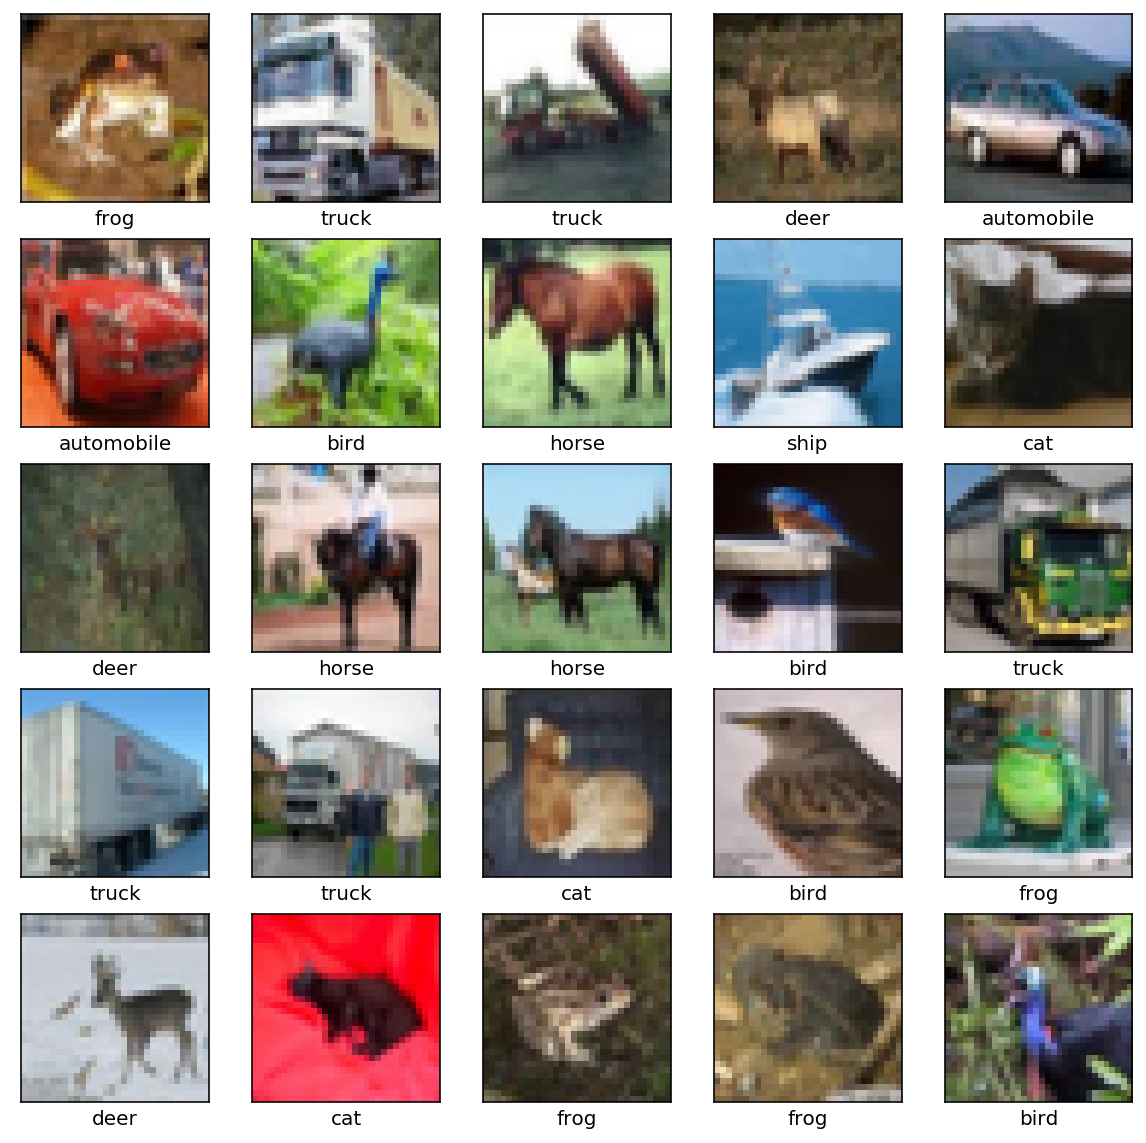

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 49s 980us/sample - loss: 1.5042 - accuracy: 0.4507 - val_loss: 1.2273 - val_accuracy: 0.5637
Epoch 2/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.1250 - accuracy: 0.6010 - val_loss: 1.1028 - val_accuracy: 0.6086
Epoch 3/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.9718 - accuracy: 0.6573 - val_loss: 0.9633 - val_accuracy: 0.6598
Epoch 4/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.8723 - accuracy: 0.6945 - val_loss: 0.9224 - val_accuracy: 0.6758
Epoch 5/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.8049 - accuracy: 0.7169 - val_loss: 0.8814 - val_accuracy: 0.6957
Epoch 6/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.7464 - accuracy: 0.7396 - val_loss: 0.8519 - val_accuracy: 0.7090
Epoch 7/10
50000/50000 [==============================

10000/10000 - 3s - loss: 0.8454 - accuracy: 0.7227


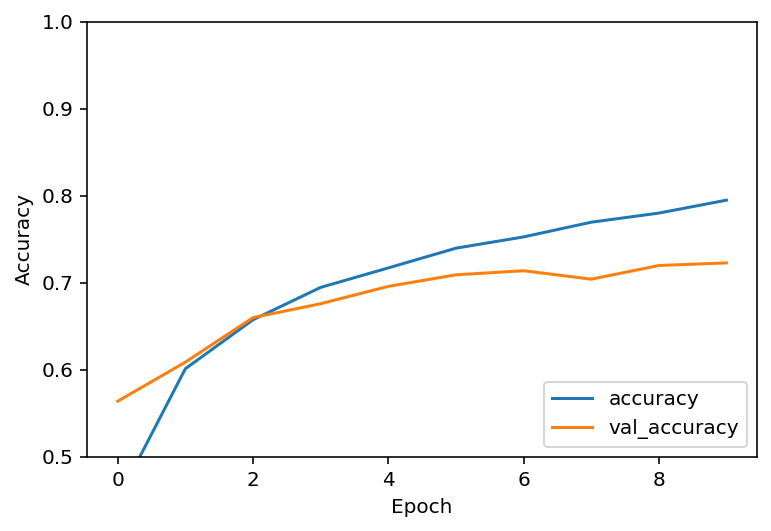

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('test_loss:', test_loss)
print('test_acc:', test_acc)

In [46]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.845445859336853
test_acc: 0.7227
